In [1]:
# kmeans - classification - unsupervised
# kmean take some random number of means

# 2,3,4,10,11,12,20,25,30
# m1 = 4       m2 = 12

# 2,1,0,6,7,8,16,21,26
# 10.9,8,2,1,0,8,13,18

# m1 = 2+3+4/3 = 3  m2 = 10+11+12+20+25+30/6 = 108/6 =18
# m1 = 5  m2=20
# m1 = 7 m2 = 25
# m1 = 7 m2 = 25


# d1={0:m1,1:m2,2:m3}

# [ row4-m1, row4-m2, row4-m3 ]
# [ 0.1,0.142,0.8]

# d2 { 0: [row4], 1: [row5,row6],2: [row7]}

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('input.csv')

#print(df.head())

data =  df.values # returns a numpy array

print(data[:10])

[[0.22767982 0.85820415]
 [0.97918822 0.07715065]
 [0.5045766  0.55311441]
 [0.0581324  0.52809798]
 [0.77534302 0.21792169]
 [0.55042383 0.47085982]
 [0.04578654 0.91857895]
 [0.58576994 0.05803225]
 [0.70907217 0.58187366]
 [0.01850393 0.88652292]]


In [19]:
class KMeans:
    def __init__(self,k=3,tolerance=0.0001,max_iterations=500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        
    def fit(self,data):
        self.averages = {}
        for i in range(self.k):
            self.averages[i] = data[i]
        
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []
            
            for val in data:
                distance = [np.linalg.norm(val - self.averages[idx]) for idx in self.averages]
                classification = distance.index(min(distance))
                self.classes[classification].append(val)
            
            previous = dict(self.averages)
            
            for num in self.classes:
                self.averages[num] = np.average(self.classes[num],axis=0)
                
            isOptimal = True
            
            for idx in self.averages:
                oldval = previous[idx]
                curval = self.averages[idx]
                
                if np.sum((curval-oldval)/oldval * 100.0)> self.tolerance:
                    isOptimal = False
                    
            if isOptimal:
                break


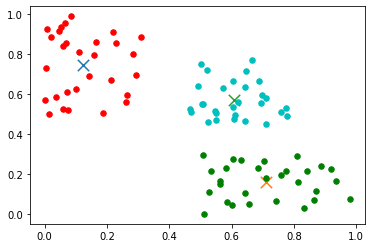

In [21]:
km = KMeans(3)

km.fit(data)

colors = ["r","g","c","b","k"]*10

for m in km.averages:
    plt.scatter(km.averages[m][0],km.averages[m][1], s = 130, marker='x')
    
for n in km.classes:
    color = colors[n]
    for val in km.classes[n]:
        plt.scatter(val[0],val[1],color=color,s=30)
    
plt.show()